In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

data = pd.read_csv('Warehouse_and_Retail_Sales.csv')

In [15]:
data.head()

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0


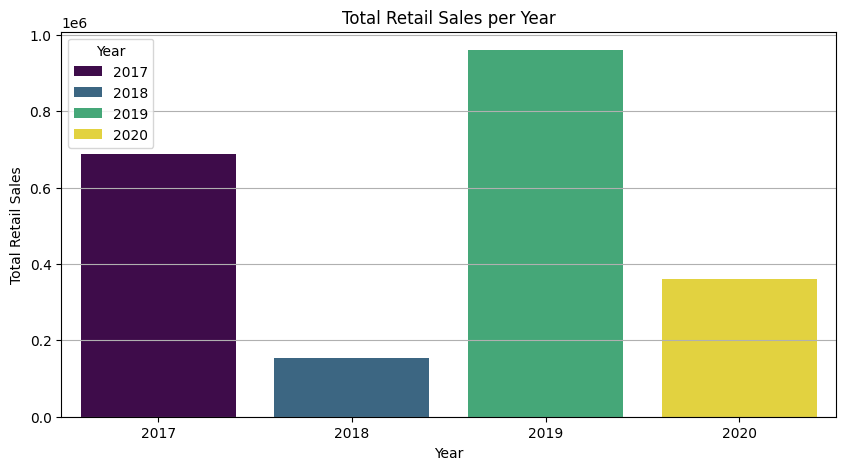

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

yearly_sales = data.groupby('YEAR')['RETAIL SALES'].sum().reset_index()

# Creating a bar plot with color based on the YEAR variable
plt.figure(figsize=(10, 5))
sns.barplot(x='YEAR', y='RETAIL SALES', hue='YEAR', data=yearly_sales, palette='viridis', dodge=False)
plt.title('Total Retail Sales per Year')
plt.xlabel('Year')
plt.ylabel('Total Retail Sales')
plt.grid(axis='y')
plt.legend(title='Year', loc='upper left')
plt.show()

In [17]:
import warnings
warnings.filterwarnings('ignore')

# Handle missing values
data['SUPPLIER'].fillna('Unknown', inplace=True)
data['ITEM TYPE'].fillna('Unknown', inplace=True)
data['RETAIL SALES'].fillna(0, inplace=True)

# Convert categorical columns to numerical using one-hot encoding
data = pd.get_dummies(data, columns=['SUPPLIER', 'ITEM TYPE'], drop_first=True)

# Drop unnecessary columns
data.drop(columns=['ITEM CODE', 'ITEM DESCRIPTION'], inplace=True)

# Normalize numerical columns
scaler = StandardScaler()
numerical_columns = ['YEAR', 'MONTH', 'RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES']
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

print("Pre-processing completed. Dataset is ready for modeling.")

Pre-processing completed. Dataset is ready for modeling.


In [18]:
# Separate features and target
X = data.drop(columns=['RETAIL SALES'])
y = data['RETAIL SALES']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Machine Learning Model: Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on the test set
lr_predictions = lr_model.predict(X_test)

# Evaluate the model
lr_mse = mean_squared_error(y_test, lr_predictions)
print(f"Linear Regression MSE: {lr_mse}")

Linear Regression MSE: 2032383552311002.5


In [20]:
# Accuracy Score
from sklearn.metrics import r2_score

lr_r2 = r2_score(y_test, lr_predictions)
print(f"Linear Regression R^2 Score: {lr_r2}")

accuracy = lr_model.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

Linear Regression R^2 Score: -2096140948304571.5
Accuracy: -2096140948304571.5


In [21]:
# rmse
from math import sqrt

rmse = sqrt(lr_mse)
print(f"RMSE: {rmse}")

RMSE: 45081964.82309752


In [22]:
# Replace the linear regression with a Ridge model (regularized) and tune alpha via GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge = Ridge()
grid_search = GridSearchCV(ridge, param_grid, scoring='neg_mean_squared_error', cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_alpha = grid_search.best_params_['alpha']
best_ridge = grid_search.best_estimator_
print(f"Best alpha: {best_alpha}")

ridge_predictions = best_ridge.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_predictions)
print(f"Ridge Regression MSE: {ridge_mse}")

Best alpha: 100
Ridge Regression MSE: 0.06562163314483378


In [23]:
# Accuracy Score
ridge_r2 = r2_score(y_test, ridge_predictions)
print(f"Ridge Regression R^2 Score: {ridge_r2}")

accuracy = best_ridge.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

Ridge Regression R^2 Score: 0.9323197670178459
Accuracy: 0.9323197670178459


In [24]:
# Using Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

dt_predictions = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_predictions)
print(f"Decision Tree MSE: {dt_mse}")

# Accuracy Score
dt_r2 = r2_score(y_test, dt_predictions)
print(f"Decision Tree R^2 Score: {dt_r2}")

accuracy = dt_model.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

Decision Tree MSE: 0.22081358021201672
Decision Tree R^2 Score: 0.7722593322024107
Accuracy: 0.7722593322024107


In [25]:
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(random_state=42)
gbr_model.fit(X_train, y_train)

gbr_predictions = gbr_model.predict(X_test)
gbr_mse = mean_squared_error(y_test, gbr_predictions)
gbr_rmse = sqrt(gbr_mse)
gbr_r2 = r2_score(y_test, gbr_predictions)
gbr_accuracy = gbr_model.score(X_test, y_test)

print(f"Gradient Boosting Regressor MSE: {gbr_mse}")
print(f"Gradient Boosting Regressor RMSE: {gbr_rmse}")
print(f"Gradient Boosting Regressor R^2 Score: {gbr_r2}")
print(f"Gradient Boosting Regressor Accuracy: {gbr_accuracy}")

Gradient Boosting Regressor MSE: 0.05840834539093726
Gradient Boosting Regressor RMSE: 0.24167818559178497
Gradient Boosting Regressor R^2 Score: 0.9397593410173765
Gradient Boosting Regressor Accuracy: 0.9397593410173765


In [26]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# XGBoost Regressor
xgboost_model = XGBRegressor(random_state=42)
xgboost_model.fit(X_train, y_train)
xgboost_predictions = xgboost_model.predict(X_test)
xgboost_mse = mean_squared_error(y_test, xgboost_predictions)
xgboost_rmse = sqrt(xgboost_mse)
xgboost_r2 = r2_score(y_test, xgboost_predictions)
xgboost_accuracy = xgboost_model.score(X_test, y_test)
print(f"XGBoost MSE: {xgboost_mse}")
print(f"XGBoost RMSE: {xgboost_rmse}")
print(f"XGBoost R^2 Score: {xgboost_r2}")
print(f"XGBoost Accuracy: {xgboost_accuracy}")

XGBoost MSE: 0.15838558395935556
XGBoost RMSE: 0.39797686359806844
XGBoost R^2 Score: 0.8366457415083758
XGBoost Accuracy: 0.8366457415083758


In [27]:
# LightGBM Regressor
lightgbm_model = LGBMRegressor(random_state=42)
lightgbm_model.fit(X_train, y_train)
lightgbm_predictions = lightgbm_model.predict(X_test)
lightgbm_mse = mean_squared_error(y_test, lightgbm_predictions)
lightgbm_rmse = sqrt(lightgbm_mse)
lightgbm_r2 = r2_score(y_test, lightgbm_predictions)
lightgbm_accuracy = lightgbm_model.score(X_test, y_test)
print(f"LightGBM MSE: {lightgbm_mse}")
print(f"LightGBM RMSE: {lightgbm_rmse}")
print(f"LightGBM R^2 Score: {lightgbm_r2}")
print(f"LightGBM Accuracy: {lightgbm_accuracy}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.046712 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1419
[LightGBM] [Info] Number of data points in the train set: 246116, number of used features: 301
[LightGBM] [Info] Start training from score 0.000700
LightGBM MSE: 0.0803596559155545
LightGBM RMSE: 0.28347778734065654
LightGBM R^2 Score: 0.9171194014216842
LightGBM Accuracy: 0.9171194014216842


In [28]:
from catboost import CatBoostRegressor

# CatBoost Regressor
catboost_model = CatBoostRegressor(verbose=0, random_state=42)
catboost_model.fit(X_train, y_train)
catboost_predictions = catboost_model.predict(X_test)
catboost_mse = mean_squared_error(y_test, catboost_predictions)
catboost_rmse = sqrt(catboost_mse)
catboost_r2 = r2_score(y_test, catboost_predictions)
catboost_accuracy = catboost_model.score(X_test, y_test)
print(f"CatBoost MSE: {catboost_mse}")
print(f"CatBoost RMSE: {catboost_rmse}")
print(f"CatBoost R^2 Score: {catboost_r2}")
print(f"CatBoost Accuracy: {catboost_accuracy}")

CatBoost MSE: 0.1910625590601322
CatBoost RMSE: 0.4371070338717191
CatBoost R^2 Score: 0.8029436651962637
CatBoost Accuracy: 0.8029436651962637


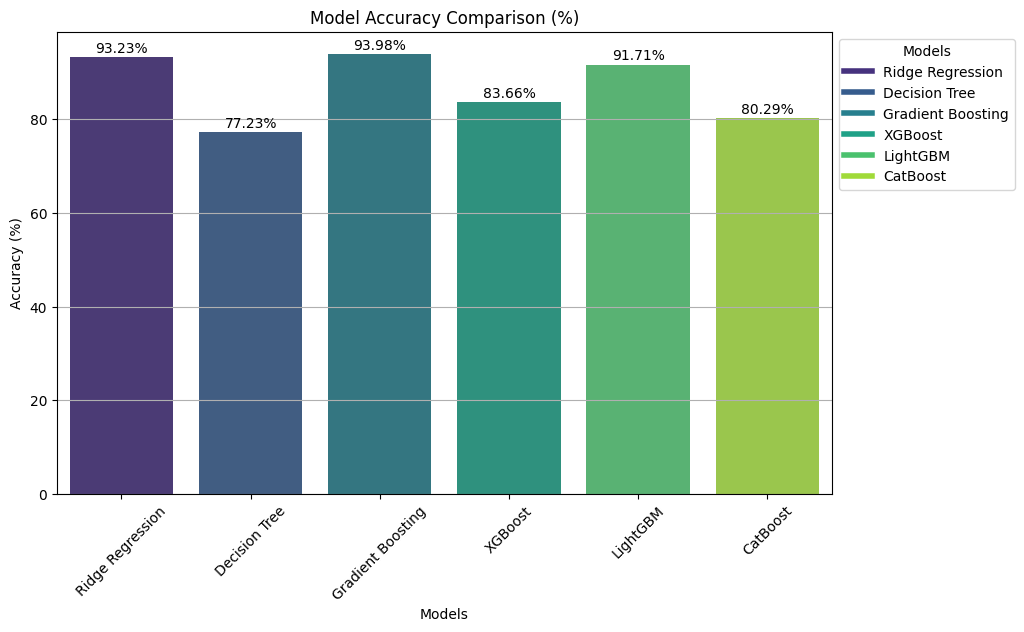

In [33]:
# Accuracy scores for each model
model_accuracies = {
    "Ridge Regression": ridge_r2 * 100,
    "Decision Tree": dt_r2 * 100,
    "Gradient Boosting": gbr_r2 * 100,
    "XGBoost": xgboost_r2 * 100,
    "LightGBM": lightgbm_r2 * 100,
    "CatBoost": catboost_r2 * 100
}

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()), palette="viridis")

# Add percentage labels on top of each bar
for index, value in enumerate(model_accuracies.values()):
    plt.text(index, value + 1, f"{value:.2f}%", ha='center', fontsize=10)

plt.title("Model Accuracy Comparison (%)")
plt.xlabel("Models")
plt.ylabel("Accuracy (%)")
plt.xticks(rotation=45)
plt.grid(axis='y')

# Add legend for models excluding Linear Regression
handles = [plt.Line2D([0], [0], color=sns.color_palette("viridis")[i], lw=4) for i in range(len(model_accuracies))]
labels = [model for model in model_accuracies.keys()]
plt.legend(handles, labels, title="Models", loc='upper left', bbox_to_anchor=(1, 1))

plt.show()